In [41]:
import pandas as pd
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt
from datetime import date
from fbprophet import Prophet

In [42]:

ETH=pd.read_csv('export-EtherPrice.csv')

ETH.head(30)


,Date(UTC),UnixTimeStamp,Value
0,7/30/2015,1438214400,0.00
1,7/31/2015,1438300800,0.00
2,8/1/2015,1438387200,0.00
3,8/2/2015,1438473600,0.00
4,8/3/2015,1438560000,0.00
5,8/4/2015,1438646400,0.00
6,8/5/2015,1438732800,0.00
7,8/6/2015,1438819200,0.00
8,8/7/2015,1438905600,3.00
9,8/8/2015,1438992000,1.20


In [43]:
ETH.tail(30)

,Date(UTC),UnixTimeStamp,Value
889,1/7/2018,1515283200,1117.75
890,1/8/2018,1515369600,1136.11
891,1/9/2018,1515456000,1289.24
892,1/10/2018,1515542400,1248.99
893,1/11/2018,1515628800,1139.32
894,1/12/2018,1515715200,1261.03
895,1/13/2018,1515801600,1385.02
896,1/14/2018,1515888000,1359.48
897,1/15/2018,1515974400,1278.69
898,1/16/2018,1516060800,1050.26


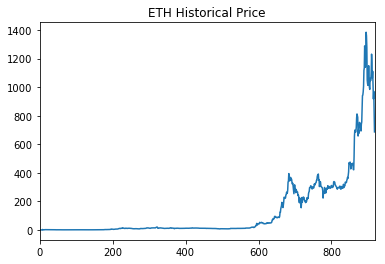

In [44]:
ETH['Value'].plot(title='ETH Historical Price')
plt.show()

In [45]:

ETH.rename(columns={'Date(UTC)':'ds','Value':'y'},inplace=True)
ETH.tail(60)

,ds,UnixTimeStamp,y
859,12/5/2017,1512432000,453.96
860,12/6/2017,1512518400,422.48
861,12/7/2017,1512604800,421.15
862,12/11/2017,1512950400,513.29
863,12/12/2017,1513036800,656.52
864,12/13/2017,1513123200,699.09
865,12/14/2017,1513209600,693.58
866,12/15/2017,1513296000,684.27
867,12/16/2017,1513382400,692.83
868,12/17/2017,1513468800,717.71


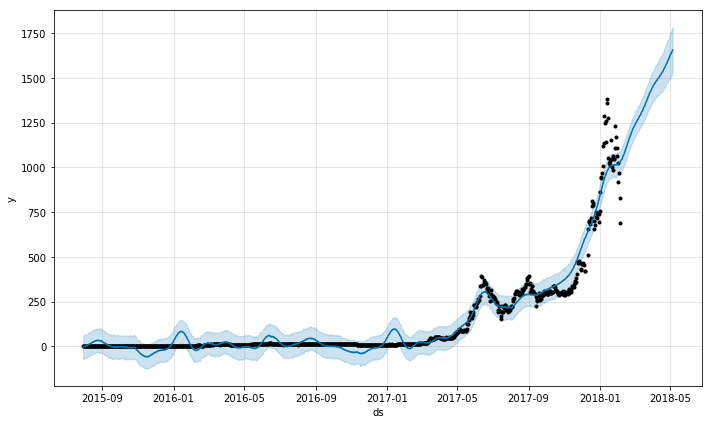

In [46]:
m=Prophet(yearly_seasonality=True)
m.fit(ETH)
future=m.make_future_dataframe(periods=90,freq='D')
forecast=m.predict(future)
plt.figure(figsize=(30,10))
fig=m.plot(forecast)
plt.show()

In [47]:
next_90=forecast.iloc[-90:,:][['ds','yhat','yhat_lower','yhat_upper']]
next_90.rename(columns={'ds':'Date','yhat':'ETH Value','yhat_lower':'Lower','yhat_upper':'Upper'},inplace=True)
next_90


,Date,ETH Value,Lower,Upper
919,2018-02-06,1036.788635,974.999296,1100.797428
920,2018-02-07,1042.415943,977.160313,1105.012838
921,2018-02-08,1045.578995,982.239530,1105.769335
922,2018-02-09,1053.407217,990.544030,1120.034639
923,2018-02-10,1063.336691,1001.488289,1126.068298
924,2018-02-11,1070.868566,1008.040774,1139.468439
925,2018-02-12,1076.800803,1011.860750,1138.774499
926,2018-02-13,1088.863831,1023.736040,1156.157147
927,2018-02-14,1098.271131,1029.779213,1167.779667
928,2018-02-15,1104.789570,1039.372260,1173.823499
